In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import random

In [2]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [9]:
mnist_train=dsets.MNIST(root='/MNIST_data/', train=True, transform=transforms.ToTensor(),
                       download=True)
mnist_test=dsets.MNIST(root='/MNIST_data/', train=False, transform=transforms.ToTensor(),
                      download=True)
data_loader=torch.utils.data.DataLoader(dataset=mnist_train, batch_size=100, shuffle=True, drop_last=True)

In [10]:
linear=nn.Linear(784, 10, bias=True)
training_epochs=15
batch_size=100
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(linear.parameters(), lr=0.1)

for epoch in range(training_epochs):
    avg_cost=0
    total_batch=len(data_loader)
    for X,Y in data_loader:
        X=X.view(-1, 28*28)
        optimizer.zero_grad()
        hypothesis=linear(X)
        cost=criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        avg_cost+=cost/total_batch
        
    print('epoch:', '%4d'% (epoch+1), 'cost=', '{:.9f}'.format(avg_cost))
    
print('Learning finished')

epoch:    1 cost= 0.536029100
epoch:    2 cost= 0.359441519
epoch:    3 cost= 0.331414998
epoch:    4 cost= 0.316781938
epoch:    5 cost= 0.307342261
epoch:    6 cost= 0.300199807
epoch:    7 cost= 0.295203984
epoch:    8 cost= 0.290963054
epoch:    9 cost= 0.287364781
epoch:   10 cost= 0.284582973
epoch:   11 cost= 0.282088310
epoch:   12 cost= 0.279769033
epoch:   13 cost= 0.277781755
epoch:   14 cost= 0.276138842
epoch:   15 cost= 0.274341822
Learning finished


Accuracy: 0.8906999826431274
label: 4
Prediction 4


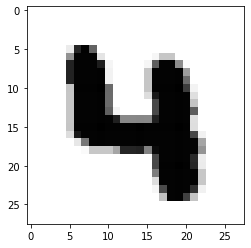

In [17]:
with torch.no_grad():
    X_test=mnist_test.test_data.view(-1,28*28).float()
    Y_test=mnist_test.test_labels
    
    prediction=linear(X_test)
    correct_prediction=torch.argmax(prediction, 1) ==Y_test
    accuracy=correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    
    r=random.randint(0, len(mnist_test)-1)
    X_single_data=mnist_test.test_data[r:r+1].view(-1, 28*28).float()
    Y_single_data=mnist_test.test_labels[r:r+1]
    
    print("label:", Y_single_data.item())
    single_prediction=linear(X_single_data)
    print('Prediction', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

Accuracy: 0.8906999826431274
Label:  2
Prediction:  2


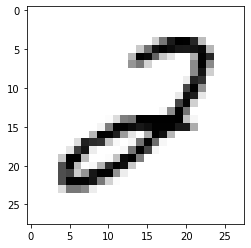

In [16]:

# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float()
    Y_test = mnist_test.test_labels

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float()
    Y_single_data = mnist_test.test_labels[r:r + 1]

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()